In [14]:
import pandas as pd
import string
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report 

## Read opinions from CSV file

In [2]:
opinions = pd.read_csv('./Opinions/opinions_full2.csv', encoding='utf-8')

In [3]:
opinions = opinions[["opinion", "score","sentiment"]]

In [4]:
opinions.sentiment = opinions.sentiment.str.lower()

In [5]:
sa = SentimentIntensityAnalyzer()
opinions['vader'] = opinions.opinion.apply(lambda o: sa.polarity_scores(str(o)))

In [6]:
sentiment = pd.concat([opinions, opinions['vader'].apply(pd.Series)], axis=1).drop(columns=['vader'])

In [7]:
sentiment

,opinion,score,sentiment,neg,neu,pos,compound
0,NaN,NaN,NaN,0.000,1.000,0.000,0.0000
1,NaN,NaN,NaN,0.000,1.000,0.000,0.0000
2,NaN,NaN,NaN,0.000,1.000,0.000,0.0000
3,NaN,NaN,NaN,0.000,1.000,0.000,0.0000
4,NaN,NaN,NaN,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...
8595,"In our household, we quickly realized that the...",1.0,negative,0.125,0.790,0.086,-0.0475
8596,"Compared to my old basic coffee maker, cleanin...",2.0,negative,0.060,0.940,0.000,-0.1531
8597,I’ve been using this coffee maker for about tw...,2.0,negative,0.095,0.817,0.088,-0.0516
8598,"As a remote worker who needs reliable coffee, ...",1.0,negative,0.000,1.000,0.000,0.0000


In [8]:
sentiment['vader_sentiment'] = sentiment.apply(
    lambda row: 'positive' if row['compound'] >= 0.05 else ('negative' if row['compound'] <= -0.05 else 'neutral'), axis=1
)

In [9]:
misclassified = confusion_matrix(sentiment['sentiment'].astype(str), sentiment['vader_sentiment'].astype(str), labels=['positive', 'neutral', 'negative'])

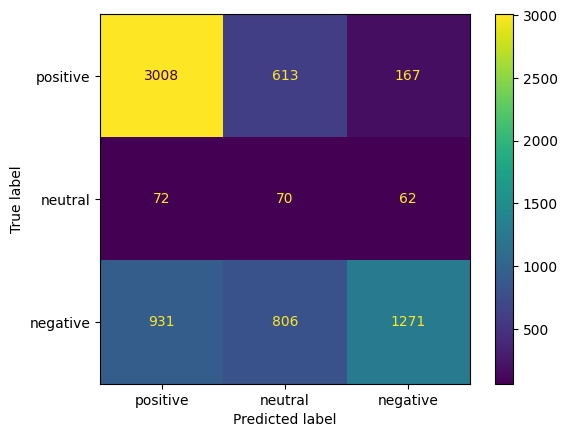

In [11]:
ConfusionMatrixDisplay(misclassified, display_labels=['positive', 'neutral', 'negative']).plot()

In [15]:
raport = classification_report(sentiment['sentiment'].astype(str), sentiment['vader_sentiment'].astype(str), labels=['positive', 'neutral', 'negative'], output_dict=True)

In [ ]:
raport_df = pd.DataFrame(raport).transpose()  

### Save results

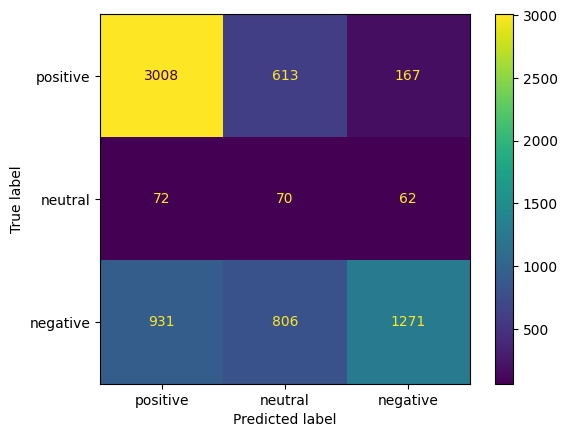

In [18]:
sentiment.to_csv("./sentiment_analysis_vader.csv", index=False, encoding="UTF-8")
raport_df.to_csv("./classification_report_vader.csv", index=True, encoding="UTF-8")
misclassified_df = pd.DataFrame(misclassified, index=['actual_positive', 'actual_neutral', 'actual_negative'], columns=['predicted_positive', 'predicted_neutral', 'predicted_negative']).to_csv("./confusion_matrix_vader.csv", index=True, encoding="UTF-8")
ConfusionMatrixDisplay(misclassified, display_labels=['positive', 'neutral', 'negative']).plot().figure_.savefig("./confusion_matrix_vader.png")